# Day 22

### OpenCV - More on Filters and Videos

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

TypeError: Image data of dtype object cannot be converted to float

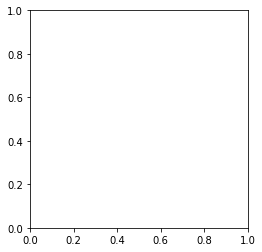

In [2]:
img = cv2.imread("Cat_1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

#### Emboss Filter

In [ ]:
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
emboss_kernel

In [ ]:
img_output = cv2.filter2D(img, -1, emboss_kernel)
plt.imshow(img_output)
cv2.imwrite("cat_emboss.jpg", img_output)

In [ ]:
outline_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
outline_kernel

In [ ]:
img_output = cv2.filter2D(img, -1, outline_kernel)
plt.imshow(img_output)
cv2.imwrite("cat_outline.jpg", img_output)

## Video Capture

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

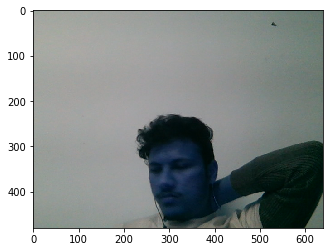

In [3]:
plt.imshow(frame)

In [ ]:
# Grey scale capture

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
cv2.imshow("Cam 1", cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY))
cap.release()

In [10]:
# Scalled Up capture

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    cv2.imshow("Cam 1", cv2.resize(frame, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_AREA))
cap.release()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [11]:
# apply perspective transform

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    num_rows, num_cols = frame.shape[:2]
    corner_points = np.float32([[0,0],
                                    [num_cols-1, 0],
                                    [0, num_rows-1],
                                    [num_cols-1, num_rows-1]]
                                )
    per = 0.2
    perspectivePoints = np.float32([[per*num_cols-1, 0],
                                     [(1-per)*num_cols-1 , 0], 
                                     [0, num_rows-1], 
                                     [num_cols-1, num_rows-1]]
                                    )
    transform_matrix = cv2.getPerspectiveTransform(corner_points, perspectivePoints)
    cv2.imshow("Cam 1", cv2.warpPerspective(frame, transform_matrix, (num_cols, num_rows)))
cap.release()

AttributeError: 'NoneType' object has no attribute 'shape'

In [12]:
# Brightness control Capture

cap = cv2.VideoCapture(0)
value = 1
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    elif c == ord("."):
        value += 0.1
    elif c == ord(","):
        value -= 0.1
    
    kernel_3 = np.array([[0,0,0],[0,value, 0],[0,0,0]])
    cv2.imshow("Cam 1", cv2.filter2D(frame, -1, kernel_3))
cap.release()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [13]:
# Blur capture

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    kernel_5 = np.ones((5,5))/25
    cv2.imshow("Cam 1", cv2.filter2D(frame, -1, kernel_5))
cap.release()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [14]:
# Blur control  capture
kernel_2 = np.ones((2,2))/4
blur_value = 1

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    if c==43 and blur_value < 15:
        blur_value += 1
    if c==45 and blur_value > 1:
        blur_value -= 1
        
    blur_kernel = np.ones((blur_value, blur_value))/(blur_value**2)
    cv2.imshow("Cam 1", cv2.filter2D(frame, -1, blur_kernel))
cap.release()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [15]:
# Sharpen Capture

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    kernel_sharpen_1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    cv2.imshow("Cam 1", cv2.filter2D(frame, -1, kernel_sharpen_1))
cap.release()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [16]:
# Blue filter Capture

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    frame[:,:,1] = 0
    frame[:,:,2] = 0
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
    for x in frame:
        for y in x:
            if y[0] < 150:
                y[0] = 0
            
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    cv2.imshow("Cam 1", frame)
cv2
cap.release()

TypeError: 'NoneType' object does not support item assignment

In [17]:
# Specific color selection (with efficient processing)

cap = cv2.VideoCapture(0)
lower = np.array([0, 0, 200])
upper = np.array([255, 255, 255])
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    cv2.imshow("cam 1", frame)
    mask = cv2.inRange(frame, lower, upper)
    frame = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow("Edit", frame)
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [18]:
# FPS counter
from time import time
cap = cv2.VideoCapture(0)
while True:
    s = time()
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    cv2.imshow("Cam 1", frame)
    e = time()
    t = e-s
    fps = 1 // (t if t != 0 else 0.01)
    print(fps, end="\r")

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


## Motion Detection

In [19]:
# Treditional Motion detection

cap = cv2.VideoCapture(0)
ret, old_frame = cap.read()
while True:
    ret, frame = cap.read()
    c =  cv2.waitKey(1)
    if c==27:
        break
    
    if np.array_equal(frame, old_frame):
        print("Motion Detected", end="\r")
    else:
        print("No Motion       ", end='\r')
    cv2.imshow("Cam 1", frame)
    old_frame = frame
cap.release()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
